In [1]:
# !conda install pandas-datareader
# !pip install yfinance

# 1. 데이터 불러오기

In [2]:
# https://finance.yahoo.com/
import pandas as pd
import numpy as np

import yfinance as yfin
from pandas_datareader import data

yfin.pdr_override()

df = data.get_data_yahoo('005930.KS', start = '2020-01-01', end = '2022-07-25')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51557.597656,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,51837.796875,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,51837.796875,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,52118.007812,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,53052.019531,23501171


# 2. 데이터 전처리

## 2.1. Time 컬럼 추가

In [3]:
df['Time'] = np.arange(len(df.index))

df.head()

,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51557.597656,12993228,0
2020-01-03,56000.0,56600.0,54900.0,55500.0,51837.796875,15422255,1
2020-01-06,54900.0,55600.0,54600.0,55500.0,51837.796875,10278951,2
2020-01-07,55700.0,56400.0,55600.0,55800.0,52118.007812,10009778,3
2020-01-08,56200.0,57400.0,55900.0,56800.0,53052.019531,23501171,4


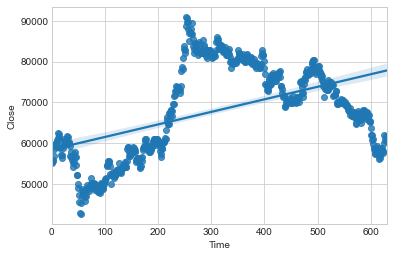

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots()
plt.rc("figure", figsize=(28, 8))
ax = sns.regplot(x='Time', y='Close', data=df)

## 2.2. Lag_1 컬럼 추가

In [5]:
df['Lag_1'] = df['Close'].shift(1)
df2 = df.reindex(columns=['Close', 'Lag_1'])

df2.head()

,Close,Lag_1
Date,,
2020-01-02,55200.0,NaN
2020-01-03,55500.0,55200.0
2020-01-06,55500.0,55500.0
2020-01-07,55800.0,55500.0
2020-01-08,56800.0,55800.0


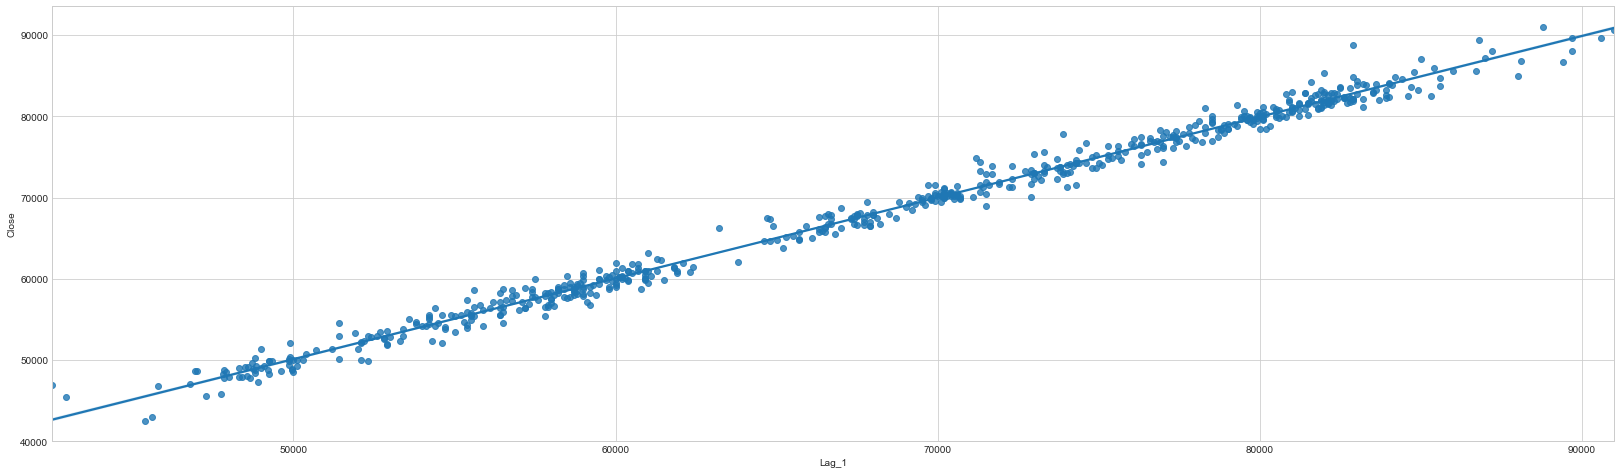

In [6]:
ax = sns.regplot(x='Lag_1', y='Close', data=df)

# 3. 학습
## 3.1. LinearRegression(1)
 - X: Time
 - y: Close

In [7]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Close']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
df['y_pred'] = model.predict(X)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time,Lag_1,y_pred
Date,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51557.597656,12993228,0,NaN,58428.883729
2020-01-03,56000.0,56600.0,54900.0,55500.0,51837.796875,15422255,1,55200.0,58459.649580
2020-01-06,54900.0,55600.0,54600.0,55500.0,51837.796875,10278951,2,55500.0,58490.415431
2020-01-07,55700.0,56400.0,55600.0,55800.0,52118.007812,10009778,3,55500.0,58521.181282
2020-01-08,56200.0,57400.0,55900.0,56800.0,53052.019531,23501171,4,55800.0,58551.947133


<AxesSubplot:xlabel='Date', ylabel='Close'>

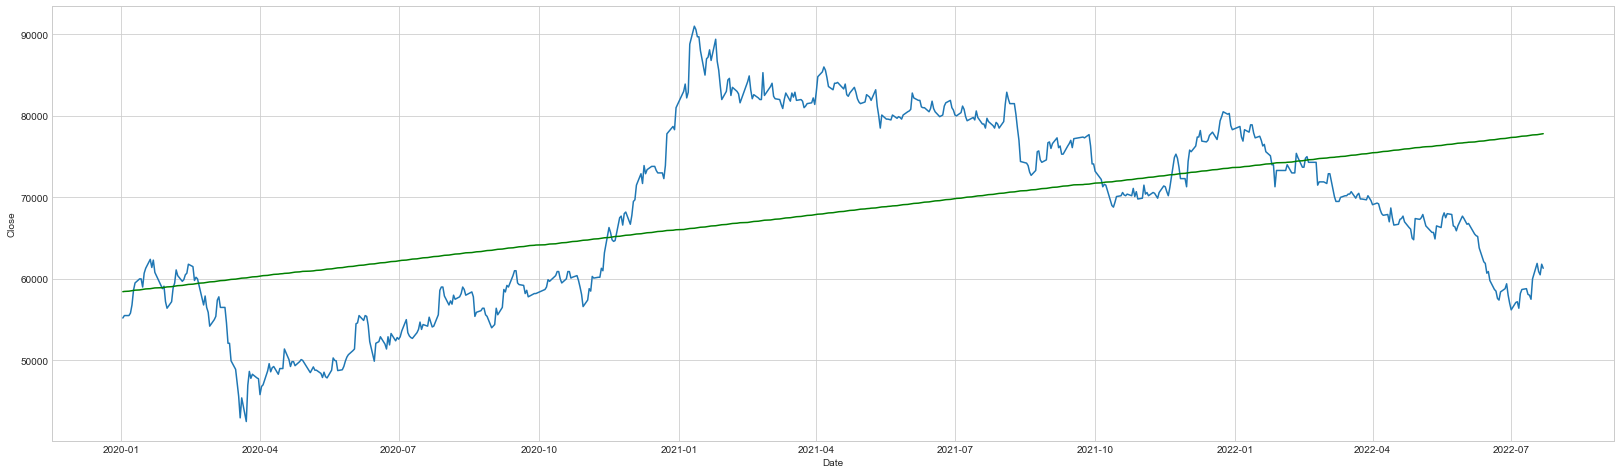

In [10]:
sns.lineplot(x= df.index, y=df['Close'])
sns.lineplot(x= df.index, y=df['y_pred'], color="g")

<AxesSubplot:xlabel='Close', ylabel='y_pred'>

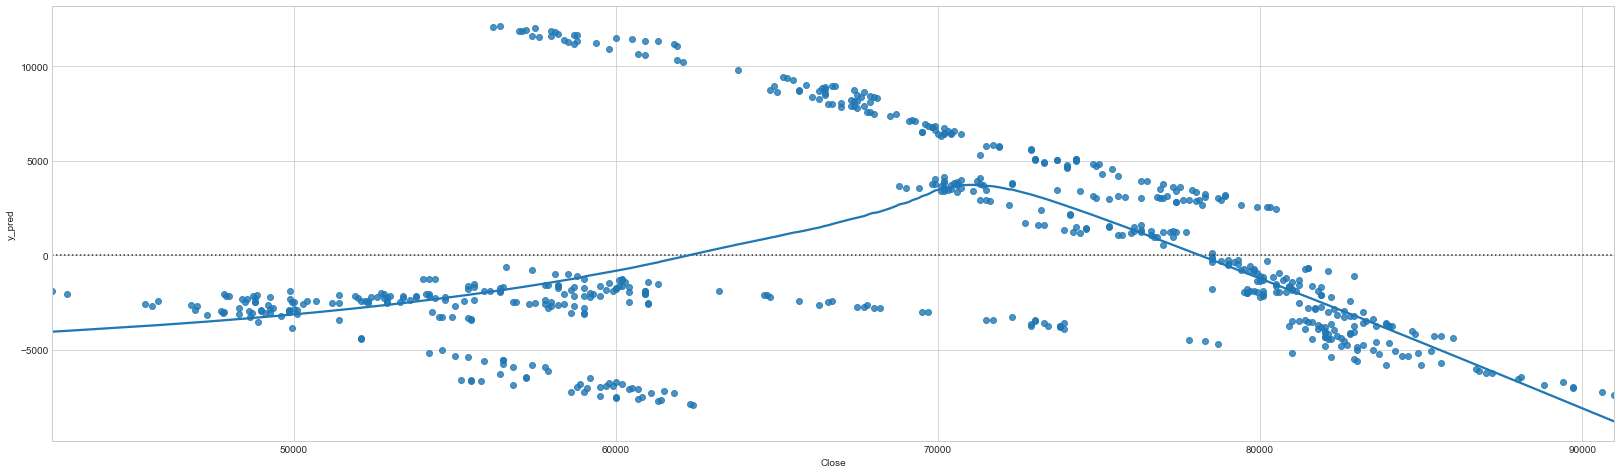

In [11]:
sns.residplot(x=df['Close'], y=df['y_pred'], lowess=True)

In [12]:
df2.dropna(inplace=True) 

## 3.2. LinearRegression(2)
 - X: Lag_1
 - y: Close

In [13]:
from sklearn.linear_model import LinearRegression

X = df2.loc[:, ['Lag_1']]
y = df2.loc[:, 'Close'] 
y, X = y.align(X, join='inner') 

model = LinearRegression()
model.fit(X, y)

df2['y_pred'] = model.predict(X)

<AxesSubplot:xlabel='Date', ylabel='Close'>

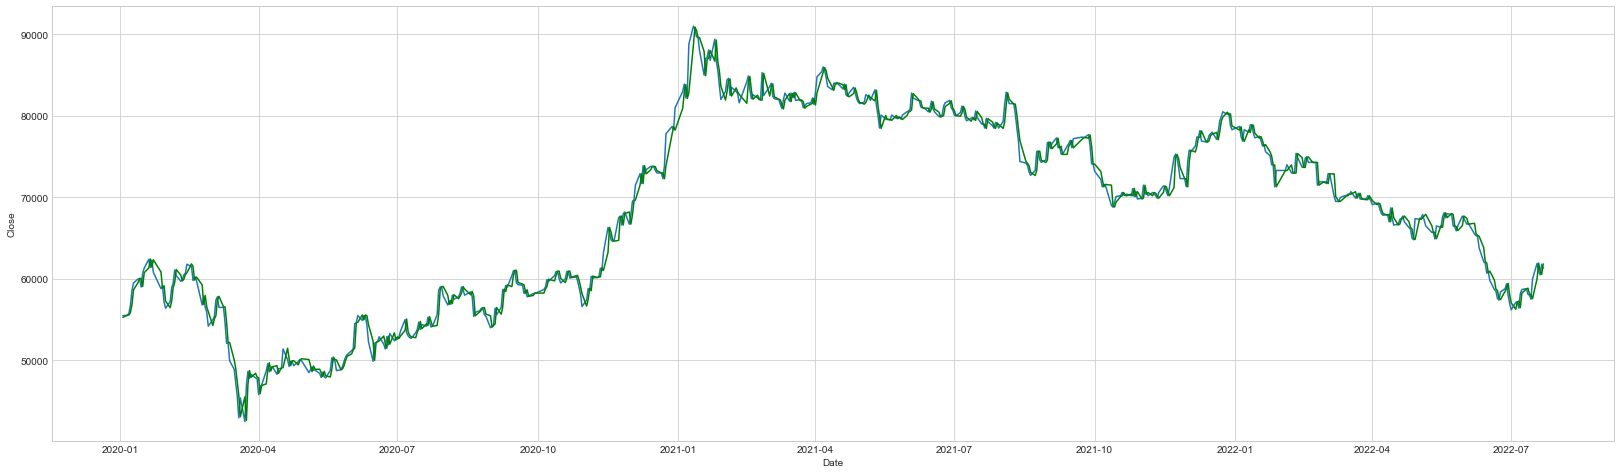

In [14]:
sns.lineplot(x= df2.index, y=df2['Close'])
sns.lineplot(x= df2.index, y=df2['y_pred'], color="g")

<AxesSubplot:xlabel='Close', ylabel='y_pred'>

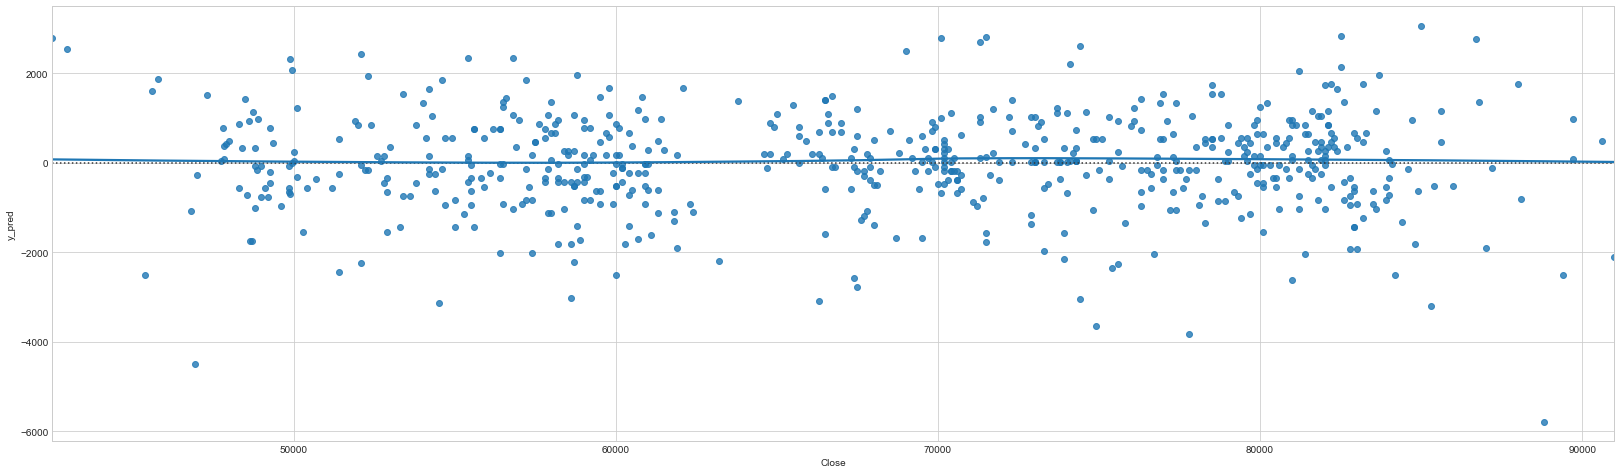

In [15]:
sns.residplot(x=df2['Close'], y=df2['y_pred'], lowess=True)

In [16]:
df3 = df2.iloc[0:300] #train
df4 = df2.iloc[300:] #test

In [17]:
X = df3.loc[:, ['Lag_1']]
y = df3.loc[:, 'Close'] 
y, X = y.align(X, join='inner') 

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
X = df4.loc[:, ['Lag_1']]
y = df4.loc[:, 'Close'] 
y, X = y.align(X, join='inner')

In [19]:
df4['y_pred2'] = model.predict(X)

<ipython-input-19-a1bbd950564e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['y_pred2'] = model.predict(X)


<AxesSubplot:xlabel='Date', ylabel='Close'>

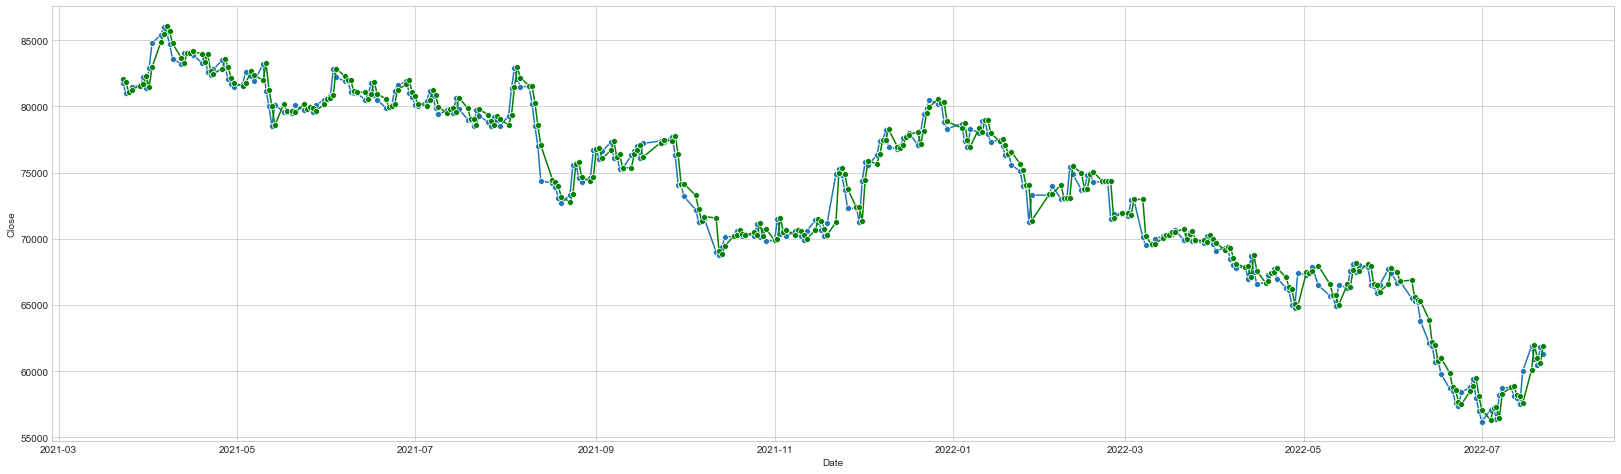

In [20]:
sns.lineplot(x= df4.index, y=df4['Close'], marker ="o")
sns.lineplot(x= df4.index, y=df4['y_pred2'], color="g", marker ="o")

<AxesSubplot:xlabel='Close', ylabel='y_pred'>

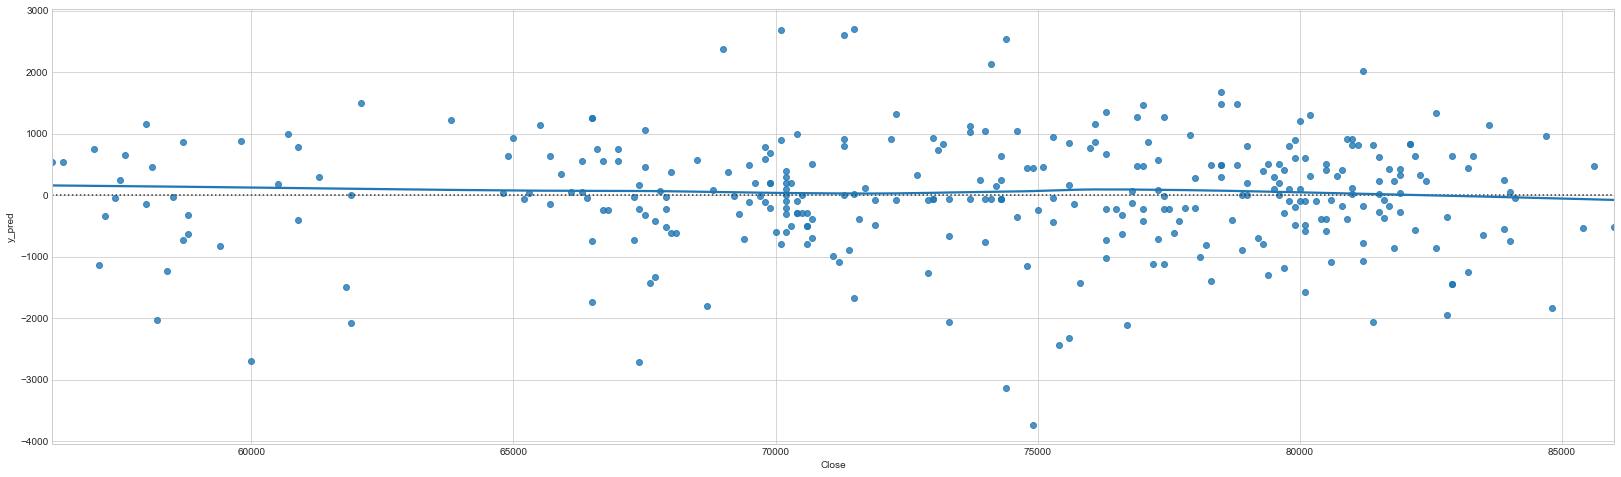

In [21]:
sns.residplot(x=df4['Close'], y=df4['y_pred'], lowess=True)

## 3.3. LSTM

### 3.3.1 데이터 전처리

In [22]:
dataset = df.filter(['Close']).values
training_data_len = int(np.ceil(len(dataset) * .95 ))

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [24]:
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60: , :]


x_train = []
y_train = []
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_train, y_train, x_test = np.array(x_train), np.array(y_train), np.array(x_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

print("x_train: {}, y_train: {}, x_test: {}, y_test: {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train: (540, 60, 1), y_train: (540,), x_test: (31, 60, 1), y_test: (31, 1)


### 3.3.2. 학습 - LSTM

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()

#return_sequences: sequence 출력여부
#input_shape: (num_timesteps, num_features)
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

540/540 [==============================] - 13s 19ms/step - loss: 0.0684


In [26]:
y_scaled_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_scaled_pred)

rmse = np.sqrt(np.mean(((y_pred - y_test) ** 2)))
rmse

1815.5919103312638

<ipython-input-27-925406b42e6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


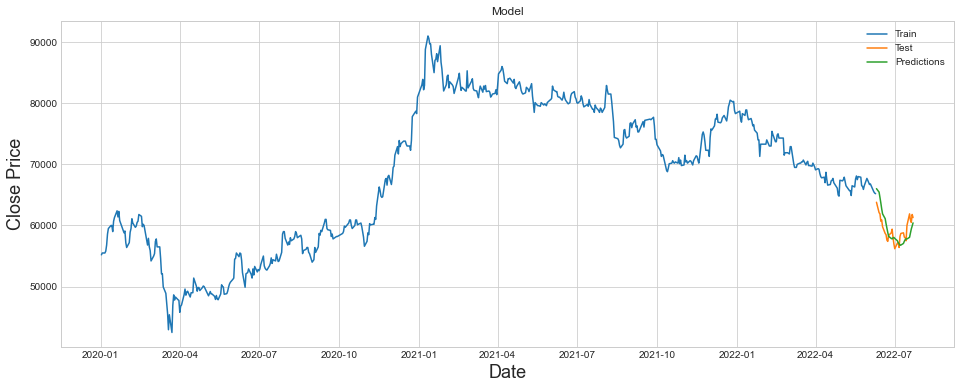

In [27]:
data = df.filter(['Close'])
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper right')
plt.show()